In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,SGDRegressor

from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

In [2]:
X = 6 * np.random.rand(200, 1) - 3
y = 0.8 * X**2 + 0.9 * X + 2 + np.random.randn(200, 1)

# y = 0.8x^2 + 0.9x + 2

Text(0, 0.5, 'y')

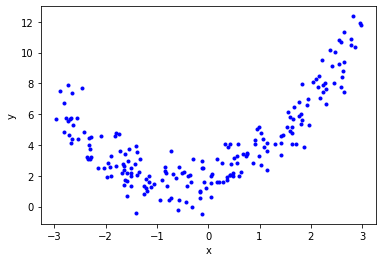

In [3]:
plt.plot(X,y,"b.")
plt.xlabel("x")
plt.ylabel("y")

In [4]:
# Train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [5]:
# Applying linear regression
lr = LinearRegression()

In [6]:
lr.fit(X_train,y_train)

LinearRegression()

In [7]:
y_pred = lr.predict(X_test)
r2_score(y_test,y_pred)

0.3232736183827133

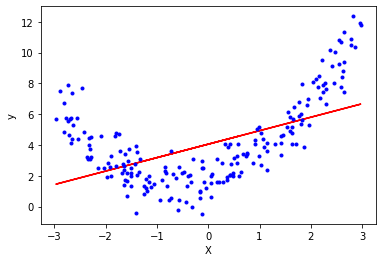

In [8]:
plt.plot(X_train,lr.predict(X_train),color='r')
plt.plot(X, y, "b.")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [37]:
poly=PolynomialFeatures(degree=20)
x_train_trans=poly.fit_transform(X_train)
x_test_trans=poly.transform(X_test)

In [38]:
print(X_train[0])

[-1.24599864]


In [39]:
print(x_train_trans[0])

[  1.          -1.24599864   1.55251262  -1.93442862   2.41029544
  -3.00322484   3.74201408  -4.66254447   5.80952409  -7.23865913
   9.01935946 -11.23810966  14.00266939 -17.44730707  21.73932095
 -27.08716442  33.75057013 -42.0531646   52.39818606 -65.28806877
  81.34884514]


In [40]:


lr = LinearRegression()
lr.fit(x_train_trans,y_train)

LinearRegression()

In [41]:
y_pred = lr.predict(x_test_trans)
r2_score(y_test,y_pred)

0.8530549528669292

In [42]:
lr.coef_,lr.intercept_

(array([[ 0.00000000e+00,  1.73840690e+00,  2.31777111e+00,
         -2.02226893e+00, -4.76241783e-01,  2.53214389e+00,
         -2.12558302e+00, -1.35456341e+00,  2.40717240e+00,
          1.35622390e-01, -1.17090563e+00,  1.32518685e-01,
          3.17467081e-01, -5.45216922e-02, -5.12186881e-02,
          8.91207054e-03,  4.88373260e-03, -6.85365025e-04,
         -2.53895550e-04,  2.04882542e-05,  5.54065042e-06]]),
 array([1.64082494]))

In [43]:
X_new=np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)

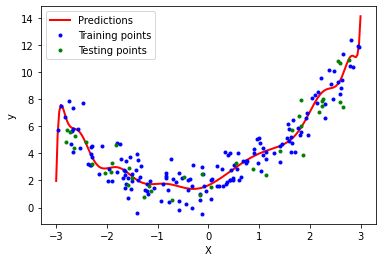

In [44]:
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()